In [ ]:
! pip install yellowbrick  # Visualization module for elbow method and silhouette analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
data = pd.read_excel("TEMP.xlsx")
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from time import time
import warnings as warn

In [ ]:
warn.simplefilter("ignore") # Disabling warnings for clear output

In [ ]:
data # Raw Data

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [ ]:
y = data["CDRGLOB"]

In [ ]:
X = data.iloc[:,31:] # Data Seperated categorical columns
X

,NACCMMSE,NACCAGEB,NACCAMD,NACCBMI,NACCAPOE,NACCNE4S,NACCICV,NACCBRNV,NACCWMVL,CSFVOL,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,30,56,10,25.1,3,0,1399.056,1118.929,481.802,279.718,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,19,65,6,30.3,1,0,1578.180,1107.680,477.910,468.740,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,29,58,1,23.2,1,0,1455.550,1187.760,527.470,266.410,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,30,72,3,30.4,1,0,1494.650,1115.330,478.960,376.840,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,27,82,9,20.8,1,0,1494.067,1014.743,444.578,471.128,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,29,67,4,27.8,1,0,1472.904,1141.103,519.282,329.904,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,27,67,4,28.3,1,0,1723.724,1192.320,535.784,521.124,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,29,68,5,25.8,1,0,1450.360,1068.170,449.420,373.560,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,30,75,13,44.2,1,0,1528.400,1105.820,487.800,391.970,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123) # Dimensionalyity reduction
z_tsne = tsne.fit_transform(X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1354 samples in 0.001s...
[t-SNE] Computed neighbors for 1354 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1354
[t-SNE] Computed conditional probabilities for sample 1354 / 1354
[t-SNE] Mean sigma: 42.959708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.660179
[t-SNE] KL divergence after 1000 iterations: 0.782350


In [ ]:
# Normalization
scaler = MinMaxScaler()  
data_scaled = scaler.fit_transform(X) # Non-Categorical datas scaled in dataset

In [ ]:
data_scaled=pd.DataFrame(data_scaled, columns= X.columns)

In [ ]:
data_scaled

,NACCMMSE,NACCAGEB,NACCAMD,NACCBMI,NACCAPOE,NACCNE4S,NACCICV,NACCBRNV,NACCWMVL,CSFVOL,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,1.000000,0.245283,0.370370,0.300885,0.4,0.0,0.516372,0.598604,0.555405,0.185950,...,0.677023,0.415899,0.486539,0.459860,0.472115,0.324252,0.539868,0.442821,0.330837,0.415386
1,0.541667,0.415094,0.222222,0.454277,0.0,0.0,0.729287,0.582644,0.544355,0.649324,...,0.729278,0.566112,0.386425,0.428332,0.582233,0.530551,0.290993,0.557287,0.608511,0.841799
2,0.958333,0.283019,0.037037,0.244838,0.0,0.0,0.583524,0.696264,0.685057,0.153327,...,0.907349,0.518606,0.791220,0.397421,0.684404,0.445533,0.562841,0.530137,0.398582,0.571239
3,1.000000,0.547170,0.111111,0.457227,0.0,0.0,0.629999,0.593498,0.547336,0.424038,...,0.847690,0.477435,0.421981,0.348847,0.599640,0.286586,0.589643,0.524707,0.245390,0.367043
4,0.875000,0.735849,0.333333,0.174041,0.0,0.0,0.629306,0.450782,0.449725,0.655178,...,0.684222,0.331781,0.373889,0.168992,0.468429,0.281780,0.321087,0.323523,0.202156,0.240798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,0.958333,0.452830,0.148148,0.380531,0.0,0.0,0.604151,0.630066,0.661811,0.308978,...,0.531736,0.554331,0.504581,0.667314,0.524169,0.746165,0.486991,0.811523,0.207660,0.329777
1350,0.875000,0.452830,0.148148,0.395280,0.0,0.0,0.902286,0.702734,0.708660,0.777739,...,0.536328,0.379034,0.492127,0.364524,0.272540,0.383691,0.571781,0.643299,0.237844,0.211139
1351,0.958333,0.471698,0.185185,0.321534,0.0,0.0,0.577354,0.526586,0.463472,0.415997,...,0.493808,0.385590,0.672699,0.384174,0.414218,0.415961,0.502537,0.475836,0.495035,0.617183
1352,1.000000,0.603774,0.481481,0.864307,0.0,0.0,0.670116,0.580005,0.572433,0.461128,...,0.832776,0.483769,0.529562,0.459242,0.498225,0.456622,0.659519,0.693039,0.568794,0.581449


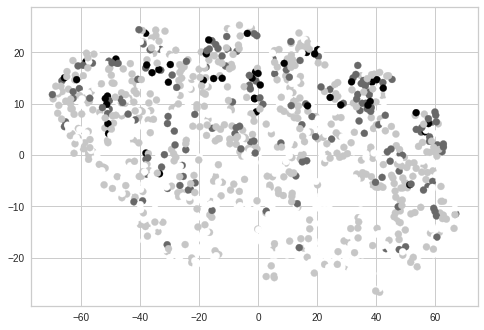

In [ ]:
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], alpha=1, c=y); #Stacettering dimensionally reduced data

In [ ]:
kmeans = KMeans(n_clusters=5  , random_state=0) # According to elbow method i set n_clusters = 5 
label = kmeans.fit_predict(data_scaled)

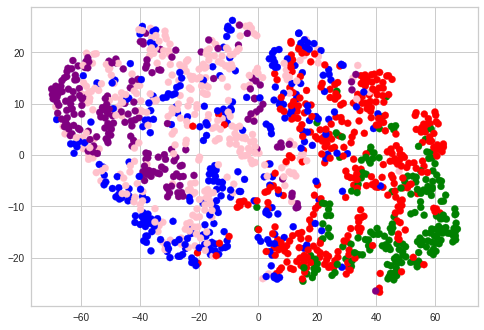

In [ ]:
cluster_colors = []
for cluster_index in label:
  if cluster_index == 0:
    cluster_colors.append("blue")
  elif cluster_index == 1:
    cluster_colors.append("red")
  elif cluster_index == 2:
    cluster_colors.append("green")
  elif cluster_index == 3:
    cluster_colors.append("purple")
  elif cluster_index == 4:
    cluster_colors.append("pink")
  
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], alpha=1, c=cluster_colors); #Stacettering dimensionally reduced data

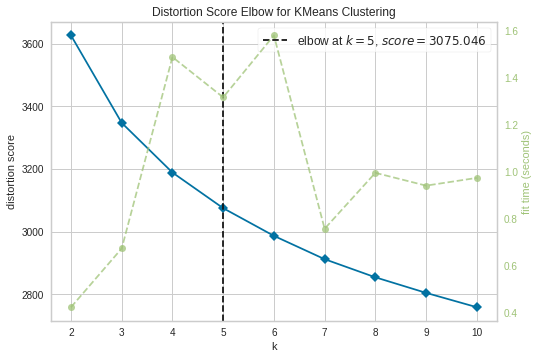

In [ ]:
elb_visualizer = KElbowVisualizer(kmeans, k=(2,11)) # Elbow method visualizer.
elb_visualizer.fit(data_scaled)    
elb_visualizer.show()  ;

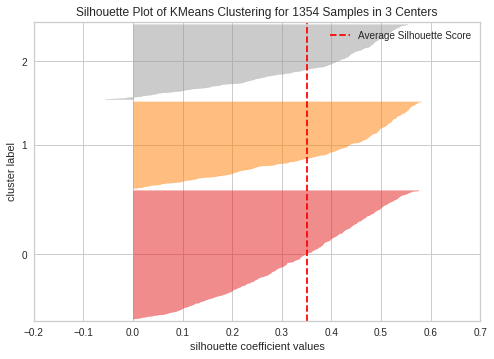

In [ ]:
model_3clust = KMeans(n_clusters = 3, random_state=42) # Silhouette analysis visualizer.

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(X)    
sil_visualizer.show();

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(data_scaled)
 
print(label)

[2 2 2 ... 2 8 7]


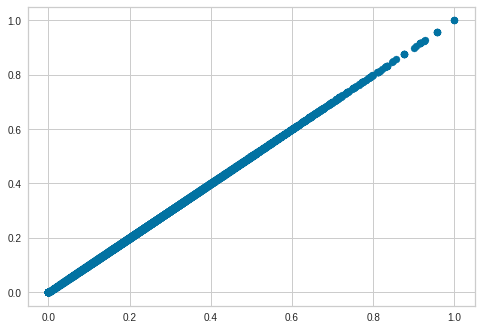

In [ ]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = data_scaled[label == 0]
 
#plotting the results
plt.scatter(filtered_label0.iloc[: ,0:] , filtered_label0.iloc[:,0:])
plt.show()

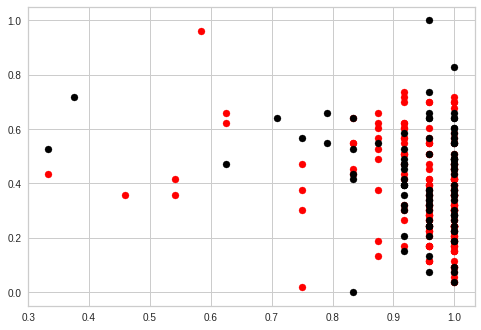

In [ ]:
#filter rows of original data
filtered_label2 = data_scaled[label == 2]
 
filtered_label8 = data_scaled[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(data_scaled) # fitting the data to the object
distances,indices=nbrs.kneighbors(data_scaled) # finding the nearest neighbours

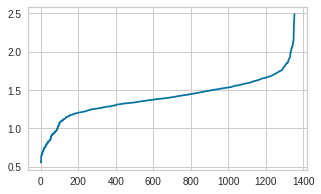

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(data_scaled) # fitting the model
labels = dbscan.labels_ # getting the labels

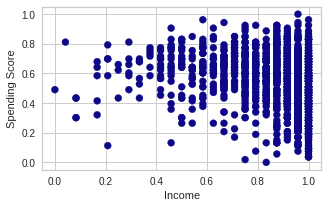

In [ ]:
# Plot the clusters
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot